# <center> Introduction to Computational General Equilibrium (CGE) Models </center>
# <center> Calibration </center>

In this notebook we'll cover some basic ideas that will introduce you to calibration for CGE modelling, i.e., parametrizing Walrasian GE models to be simulated in a computer.

# Homothetic Preferences

In the notebook [Introduction to CGE](https://github.com/SMU-Econ-Growth/EconGrowthUG-Notebooks/blob/main/IntroCGE.ipynb), we showed that if preferences are of the Cobb-Douglas type, the (optimal) demand by individual $i$ for good $j$ is given by 

$$
x^*_{ij}=\frac{1}{p_j}\frac{\alpha_{ij}}{\sum_{j=1}^M \alpha_{ij}}y_i.
$$

More generally, we know the same is true of individuals that have homothetic preferences.

So, the share of income spent on good $j$ has to be equal to

$$
\frac{\alpha_{ij}}{\sum_{j=1}^M \alpha_{ij}}.
$$

Given these preferences, we showed that if we knew the values of $\alpha_{ij}$ for all consumers $i$ and goods $j$, then we could find out what equilibrium prices and allocations would be. 

## But where did those numbers come from?

# Computational Experiments

In the notebook [Introduction to CGE](https://github.com/SMU-Econ-Growth/EconGrowthUG-Notebooks/blob/main/IntroCGE.ipynb), we basically used the computer to "play" with an economy and learn about its properties.

But we could have used the computer to answer a quantitative question using our theory and data

In [12]:
# Import display options for showing websites
from IPython.display import IFrame, HTML
url = 'https://www.dropbox.com/scl/fi/o7mhxmvgqerhzf26nz17o/Kydland-Prescott-The-Computational-Experiment-An-Econometric-Tool-JEL-1996.pdf?rlkey=o1qxktvgky21o2fplkhveiz6a&raw=1'
IFrame(url, width=1600, height=600)

According [Kydland and Prescott (1997)](https://www.dropbox.com/scl/fi/o7mhxmvgqerhzf26nz17o/Kydland-Prescott-The-Computational-Experiment-An-Econometric-Tool-JEL-1996.pdf?rlkey=o1qxktvgky21o2fplkhveiz6a&raw=1) there are 5 steps to a computational experiment:

1. Pose a (quantitative) question
    * Computer not needed for qualitative questions (e.g., increases/descreses)
    * Welfare and distributive consequences of some policy
    * Testing and development of theory (quantitative implications of theory for some phenomena)
    * Sensitivity of previous findings to the introduction of some feature of reality that had been abstracted

3. Use a well-tested theory
4. Construct a model economy
5. Calibrate the model economy
6. Run the experiment

# Calibration

The exact definition of calibration seems to be still discussed (see e.g., [here](https://orderstatistic.wordpress.com/2014/04/07/what-the-heck-is-calibration-anyway/)).

In [8]:
# Import display options for showing websites
from IPython.display import IFrame, HTML
url = 'https://www.dropbox.com/scl/fi/o7mhxmvgqerhzf26nz17o/Kydland-Prescott-The-Computational-Experiment-An-Econometric-Tool-JEL-1996.pdf?rlkey=o1qxktvgky21o2fplkhveiz6a&raw=1'
IFrame(url, width=1000, height=600)

# Computation

Given our assumptions on the utility functions of individuals, we know there exists a unique Walrasian equilibrium for our economy. This is important, since if we want to compute an equilibrium, we **need** to know it exists (otherwise we would be trying the impossible!) and, additionally, that what we find is indeed the only solution (if there are multiple isolated equilibria we could try to find them, but this is only possible if it is a finite set).

Let us create some functions that will allow us to solve this problem.

In [1]:
import numpy as np
from scipy.misc import derivative
import itertools
%matplotlib widget

import matplotlib.pyplot as plt


def CobbDouglas(x, alpha, h=1e-10, deriv=False):
    '''
    Compute the utility of an individual with Cobb-Douglas preferences
    Additionally it returns the exact and numerical derivatives
    x: (1 x N) vector
    alpha:(1 x N) vector
    '''
    lx = len(x)
    try:
        u = (x ** alpha).prod(axis=1)
    except:
        u = (x ** alpha).prod()
    if deriv:
        uprime = alpha * u / x
        nuprime = (((x + (np.zeros([lx, lx]) + h * np.eye(lx)))**alpha).prod(axis=1) - ((x + (np.zeros([lx, lx]) - h * np.eye(lx)))**alpha).prod(axis=1)) / (2 * h)
        du = [uprime, nuprime]
        return [u, du]
    else:
        return u

Let's compute the utility for "all" values of $x$ in $[0,10]^M$ and plot them.

In [2]:
N = 1 # Individuals
M = 2 # Goods
alpha = np.array([0.5, 0.5])
x = np.linspace(0, 10, num=100)
X = np.array([i for i in itertools.product(x, repeat=M)])

In [3]:
u = CobbDouglas(X, alpha)
u

array([ 0.        ,  0.        ,  0.        , ...,  9.89847453,
        9.94936676, 10.        ])

Text(0.5, 1.0, 'Indiference Map')

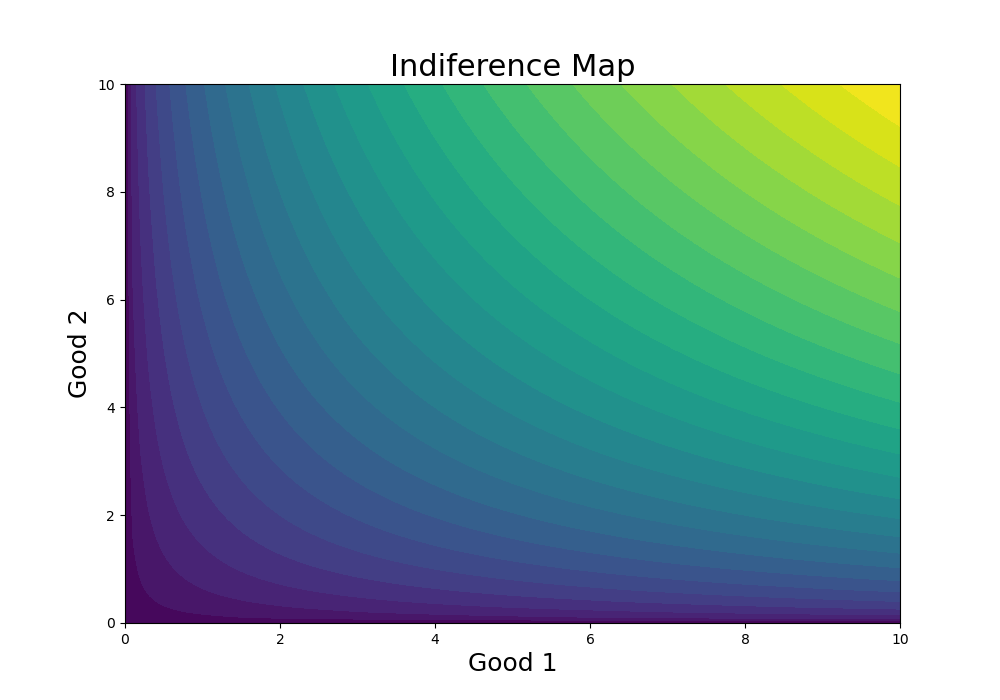

In [7]:
fig, ax = plt.subplots(figsize=(10,7))
plt.contourf(x, x, u.reshape(len(x), len(x)), 30)
plt.xlabel('Good 1', size=18)
plt.ylabel('Good 2', size=18)
plt.title('Indiference Map', size=22)

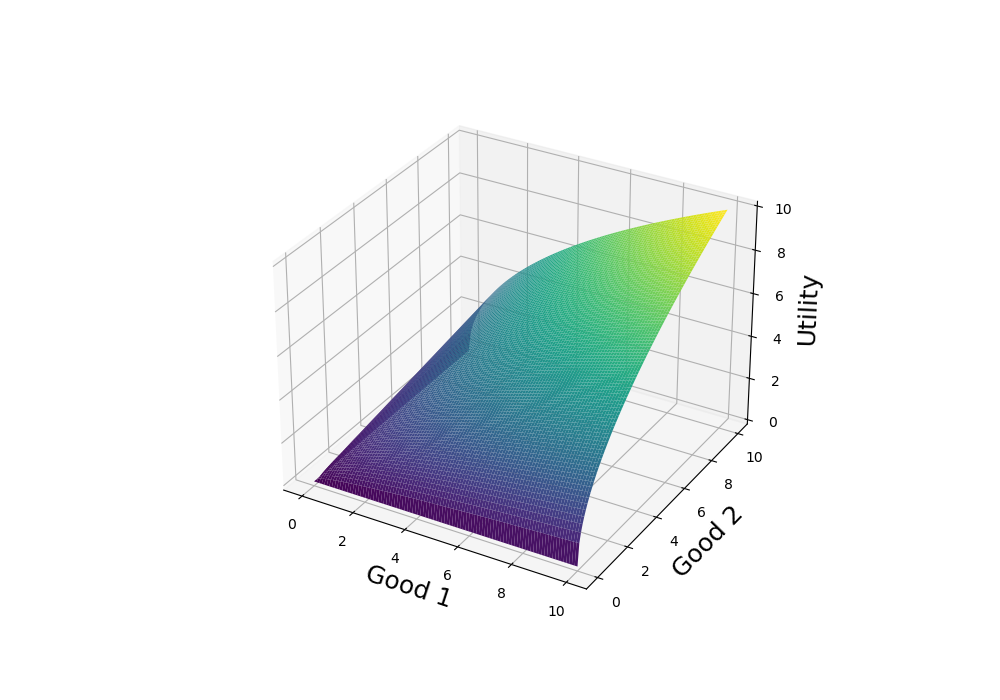

In [9]:
from mpl_toolkits.mplot3d import Axes3D
xx, yy = np.meshgrid(x, x)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xx, yy, u.reshape(len(x), len(x)), rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel('Good 1', size=18)
ax.set_ylabel('Good 2', size=18)
ax.set_zlabel('Utility', size=18)
plt.show()

## Demands

Since we computed the actual demand functions $x^*_i=x^*(p, \omega_i)$ for each good $j$ for each individual $i$, in this case we can simply compute the optimal demand for each individual $i$ given her initial endowments $\omega_i$ and prices $p$.

In [10]:
def CobbDouglasDemand(p, w, alpha):
    '''
    Compute the demand vector of an individual with Cobb-Douglas Utility with parameter vector alpha,
    given her initial endowments and prices for all goods
    '''
    # Total income
    y = w.dot(p)
    ly = len(y)
    x = ((alpha / alpha.sum(axis=1, keepdims=True) * y).T / p).T
    return x

In [11]:
def ExcessDemand(p, w, alpha):
    '''
    Compute excess demand function for each good
    '''
    z = CobbDouglasDemand(p, w, alpha).sum(axis=0) - w.sum(axis=0)
    return z

# A $1\times2$ Economy

In [12]:
# Let's test to make sure function is well written
alpha = np.array([[0.5, 0.5]])
w = np.array([[1, 2]])
p = np.array([[2, 1]]).T

In [13]:
CobbDouglasDemand(p, w, alpha)

array([[1., 2.]])

In [14]:
ExcessDemand(p, w, alpha)

array([0., 0.])

## This is an equilibrium, but of course in an economy with only 1 individual, $(p^*, x^*)=(p^*,\omega)$ is an equilibrium for any $p^*$.

# A $2\times2$ Economy

In [15]:
alpha = np.array([[0.5, 0.5], [0.25, 0.75]])
w = np.array([[1, 2], [2, 2]])
p = np.array([[2, 1]]).T

In [16]:
CobbDouglasDemand(p, w, alpha)

array([[1.  , 2.  ],
       [0.75, 4.5 ]])

In [17]:
ExcessDemand(p, w, alpha)

array([-1.25,  2.5 ])

## Here we have excess supply for good 1 and excess demand for good 2

# A $3\times2$ Economy

In [18]:
alpha = np.array([[0.5, 0.5], [0.25, 0.75], [0.5, 0.5]])
w = np.array([[1, 2], [2, 2], [1, 2]])
p = np.array([[2, 1]]).T

In [19]:
CobbDouglasDemand(p, w, alpha)

array([[1.  , 2.  ],
       [0.75, 4.5 ],
       [1.  , 2.  ]])

In [20]:
ExcessDemand(p, w, alpha)

array([-1.25,  2.5 ])

## Again we have excess supply for good 1 and excess demand for good 2

# A $2\times4$ Economy
## Similar preference for two types of goods

In [21]:
# Economy with 2 individuals of each type and 4 goods 2 groups of identical goods
alpha = np.array([[0.5, 0.5] * 2, [0.25, 0.75] * 2])
w = np.array([[1, 2] * 2, [2, 2] * 2] )
p = np.array([[2, 1] * 2]).T

In [22]:
CobbDouglasDemand(p, w, alpha)

array([[1.  , 2.  , 1.  , 2.  ],
       [0.75, 4.5 , 0.75, 4.5 ]])

In [23]:
ExcessDemand(p, w, alpha)

array([-1.25,  2.5 , -1.25,  2.5 ])

## We have excess supply for goods 1 & 3 and excess demand for goods 2 & 4

# A $12\times2$ Economy
## 2 types of individuals 
## 6 individuals of each type  

In [24]:
# Same economy with 6 individuals of each type
alpha = np.array([[0.5, 0.5], [0.25, 0.75]] * 6)
w = np.array([[1, 2], [2, 2]] * 6)
p = np.array([[2, 1]]).T

In [25]:
CobbDouglasDemand(p, w, alpha)

array([[1.  , 2.  ],
       [0.75, 4.5 ],
       [1.  , 2.  ],
       [0.75, 4.5 ],
       [1.  , 2.  ],
       [0.75, 4.5 ],
       [1.  , 2.  ],
       [0.75, 4.5 ],
       [1.  , 2.  ],
       [0.75, 4.5 ],
       [1.  , 2.  ],
       [0.75, 4.5 ]])

In [26]:
ExcessDemand(p, w, alpha)

array([-7.5, 15. ])

## Again we have excess supply for good 1 and excess demand for good 2

# A random $5\times 10$ Economy

In [27]:
# Generate a random economy
np.random.seed(123456)
N = 5 # Individuals
M = 10 # Goods
alpha = np.random.uniform(0, 1, size=(N, M))
w = np.random.uniform(0, 1, size=(N, M))
p = np.random.uniform(0, 1, size=(1, M)).T

In [28]:
CobbDouglasDemand(p, w, alpha)

array([[ 0.06294882, 15.384009  ,  0.35974815,  1.78605326,  0.98713098,
         1.4619451 ,  0.32224148,  0.46684643,  0.21707141,  0.38702674],
       [ 0.1644502 ,  6.33970455,  0.15897394,  1.52212019,  1.91146183,
         1.36125119,  0.14530766,  0.3837844 ,  0.93265339,  0.08717989],
       [ 0.44055175,  3.90468844,  0.21041224,  1.22336136,  1.56694785,
         0.27756504,  0.43915708,  0.1420236 ,  0.62545458,  0.73122106],
       [ 0.6263485 ,  0.82583705,  1.63481706,  2.06095533,  1.45856805,
         2.05221523,  0.16764338,  0.30126113,  1.5545487 ,  0.26888522],
       [ 0.16962293, 10.26114459,  0.40995851,  0.89941164,  0.22872069,
         2.25932655,  0.21872618,  0.14075043,  0.77759137,  0.10540906]])

In [29]:
ExcessDemand(p, w, alpha)

array([-0.92823133, 33.45476917,  1.04394497,  5.49562486,  4.16797743,
        5.72879772, -2.22220818, -1.85816175,  1.5840073 , -0.78118152])

## Now we have excess supply for goods 1, 7, 8, and 10, and excess demand for the other

# How can we find the equilibrium price?

# We need excess demands to be equal to zero!

So, we only need to use our computer to find the zero of an equation. Luckily, this is a very well studied problem (see [this Wikipedia entry](https://en.wikipedia.org/wiki/Root-finding_algorithms)). In ``python`` we can use the ``scipy`` package.

In [30]:
from scipy.optimize import root

But before we use this to try to find an equilibrium, we need to remember a few things.

1. Equlibrium prices only determine relative prices, not absolute ones, so we need to decide on a numeraire. Various choices, e.g. chose $p_j=1$ for some good $j$. Another common option is to normalize the price vector so it has length 1.

2. Walras Law: If $M-1$ markets clear, then the $M^{th}$ market also clears.

So let's define a new excess demand function that takes these issues into account.

In [31]:
def ExcessDemand2(p, w, alpha, normalize=False):
    '''
    Compute excess demand function for all but the last good
    Price of good 1 = 1
    Prices are normalized to length of vector is equal to 1
    '''
    # Ensure p has the right shape
    p = p.reshape((np.max(p.shape), 1))
    p = np.vstack([[1], p])
    if normalize:
        p = (p / np.linalg.norm(p))
    z = CobbDouglasDemand(p, w, alpha).sum(axis=0) - w.sum(axis=0)
    return z[1:]

# Simple $2\times2$ Economy

In [32]:
alpha = np.array([[0.5, 0.5], [0.25, 0.75]])
w = np.array([[1, 2], [2, 2]])
p = np.array([[1, 0.5]]).T

Notice that the excess demand with normalized prices generates the same excess demand as with the original price vector

In [33]:
CobbDouglasDemand(p, w, alpha)

array([[1.  , 2.  ],
       [0.75, 4.5 ]])

In [34]:
ExcessDemand(p, w, alpha)

array([-1.25,  2.5 ])

In [35]:
ExcessDemand2(p[1:], w, alpha)

array([2.5])

## Now let's compute the equilibrium price vector

In [36]:
sol = root(ExcessDemand2, np.array([1]), args=(w, alpha))

In [37]:
sol

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.41060513e-13])
       r: array([1.12500002])
  status: 1
 success: True
       x: array([1.33333333])

## Let's use the result to reconstruct the full equilibrium price vector and check excess demands 

In [38]:
pstar = np.vstack([[1], sol.x])
ExcessDemand(pstar, w, alpha)

array([0., 0.])

# Similar $2\times 4 $ Economy

In [39]:
# Economy with 2 individuals of each type and 4 goods 2 groups of identical goods
alpha = np.array([[0.5, 0.5] * 2, [0.25, 0.75] * 2])
w = np.array([[1, 2] * 2, [2, 2] * 2] )
p = np.array([[2, 1] * 2]).T
p = p / p[0]

In [40]:
ExcessDemand(p, w, alpha)

array([-1.25,  2.5 , -1.25,  2.5 ])

In [41]:
ExcessDemand2(p[1:], w, alpha)

array([ 2.5 , -1.25,  2.5 ])

## Now let's compute the equilibrium price vector

In [42]:
sol = root(ExcessDemand2, p[1:], args=(w, alpha))

In [43]:
sol

    fjac: array([[-0.62895721,  0.65802207,  0.41402873],
       [-0.37302649, -0.72267448,  0.5818873 ],
       [-0.68210268, -0.21153853, -0.69999099]])
     fun: array([ 3.55271368e-15, -3.46389584e-14,  3.55271368e-15])
 message: 'The solution converged.'
    nfev: 22
     qtf: array([-1.01465740e-10,  1.11012285e-10,  1.00525300e-11])
       r: array([ 12.46421401,  -6.92935655,  -1.09460301,   7.56845431,
       -12.41387919,   0.23254797])
  status: 1
 success: True
       x: array([1.33333333, 1.        , 1.33333333])

## Let's use the result to reconstruct the full equilibrium price vector and check excess demands 

In [44]:
pstar = sol.x
pstar = pstar.reshape((np.max(pstar.shape), 1))
pstar = np.vstack([[1], pstar])
ExcessDemand(pstar, w, alpha)

array([ 2.66453526e-14,  3.55271368e-15, -3.46389584e-14,  3.55271368e-15])

# $6\times 2$ Economy

Let's try with a larger economy

In [45]:
# Same economy with 6 individuals of each type
alpha = np.array([[0.5, 0.5], [0.25, 0.75]] * 6)
w = np.array([[1, 2], [2, 2]] * 6)
p = np.array([[2, 1]]).T

## Now let's compute the equilibrium price vector

In [46]:
sol = root(ExcessDemand2, p[1:], args=(w, alpha))

In [47]:
sol

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.04636308e-12])
       r: array([6.7500001])
  status: 1
 success: True
       x: array([1.33333333])

## Let's use the result to reconstruct the full equilibrium price vector and check excess demands 

In [48]:
pstar = sol.x
pstar = pstar.reshape((np.max(pstar.shape), 1))
pstar = np.vstack([[1], pstar])
ExcessDemand(pstar, w, alpha)

array([0., 0.])

# And even larger economy $10\times5$

In [49]:
# Generate a random economy
np.random.seed(123456)
N = 5 # Individuals
M = 10 # Goods
alpha = np.random.uniform(0, 1/M, size=(N, M))
w = np.random.uniform(0, 1/M, size=(N, M))
p = np.random.uniform(0, 1/M, size=(1, M)).T

In [50]:
alpha.sum(axis=1)

array([0.49221316, 0.47207785, 0.46207345, 0.48029696, 0.47177654])

In [51]:
ExcessDemand2(np.ones((1, M-1)).T, w, alpha)

array([-0.07674737,  0.03088612,  0.18651534,  0.0374476 ,  0.01341667,
       -0.16281969, -0.06375667, -0.01270213, -0.01086539])

## Now let's compute the equilibrium price vector

In [52]:
sol = root(ExcessDemand2, np.ones((1, M-1)).T, args=(w, alpha))

In [53]:
sol

    fjac: array([[-0.97464726,  0.04059005,  0.08124723,  0.04631381,  0.05691774,
         0.12506279,  0.10236769,  0.07151283,  0.07208003],
       [ 0.03606727, -0.9383307 ,  0.12858517,  0.0672332 ,  0.12461059,
         0.16820018,  0.13556554,  0.17119197,  0.07534189],
       [ 0.05447312,  0.07375412, -0.81455107,  0.12017277,  0.15913621,
         0.31160695,  0.32369185,  0.17513512,  0.23619085],
       [ 0.03593944,  0.06136329,  0.10218258, -0.92937828,  0.10782306,
         0.17224962,  0.2146313 ,  0.16276907,  0.0830754 ],
       [ 0.02531927, -0.00238874,  0.06856393,  0.02847763, -0.92539275,
         0.22470325,  0.20311207,  0.1395213 ,  0.16210258],
       [-0.06792698, -0.08794553, -0.13177869, -0.06141629, -0.08241399,
        -0.87127438,  0.32258962,  0.21891082,  0.22049218],
       [-0.06080575, -0.06604033, -0.18310706, -0.12400818, -0.07871698,
        -0.04434082, -0.7964004 ,  0.40682752,  0.36757368],
       [-0.05303592, -0.14892238, -0.09858614, -0.14

## Let's use the result to reconstruct the full equilibrium price vector and check excess demands 

In [54]:
pstar = sol.x
pstar = pstar.reshape((np.max(pstar.shape), 1))
pstar = np.vstack([[1], pstar])
ExcessDemand(pstar, w, alpha)

array([ 4.47104298e-11,  2.43798037e-10, -5.31184957e-10,  2.49777976e-12,
        6.04061079e-10, -1.99401939e-10, -1.21951560e-10, -4.86894192e-10,
        3.44903162e-10,  9.40439393e-12])

# Let's now replicate this with CES utility

The CES utility function is given by

$$
u_i(x_i)=u_i(x_{i1},\ldots,x_{iM})=\left(\sum_{j=1}^M a_{ij}^{\frac{1}{\sigma}}x_{ij}^{\frac{\sigma-1}{\sigma}}\right)^{\frac{\sigma}{\sigma-1}} = X_i^{\frac{\sigma}{\sigma-1}}
$$
where 

$$
X_i=\sum_{j=1}^M a_{ij}^{\frac{1}{\sigma}}x_{ij}^{\frac{\sigma-1}{\sigma}}.
$$

So, the marginal utility given by

$$
\frac{\partial u_i}{\partial x_{ij}}=\frac{\sigma}{\sigma-1} X_i^{\frac{\sigma}{\sigma-1}-1}
\frac{\sigma-1}{\sigma}a_{ij}^{\frac{1}{\sigma}}x_{ij}^{\frac{\sigma-1}{\sigma}-1}
$$

which is equivalent to

$$
\frac{\partial u_i}{\partial x_{ij}}= \frac{u_i}{X_i}
\frac{a_{ij}^{\frac{1}{\sigma}}x_{ij}^{\frac{\sigma-1}{\sigma}}}{x_{ij}}
$$

## Exercise
1. Write the functions to compute the demand and excess demand functions for an economy where individuals have CES preferences
2. Use the previous code to compute the equilibrium price vector.